In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate 2000 patient blood pressure readings
np.random.seed(42)

# Simulate systolic blood pressure: mean ~130, std ~15, range 100–180
bp_values = np.random.normal(loc=130, scale=15, size=2000)
bp_values = np.clip(bp_values, 100, 180)  # keep within realistic range

# Convert to DataFrame
df = pd.DataFrame(bp_values, columns=["BloodPressure"])
print(df.head())

   BloodPressure
0     137.450712
1     127.926035
2     139.715328
3     152.845448
4     126.487699


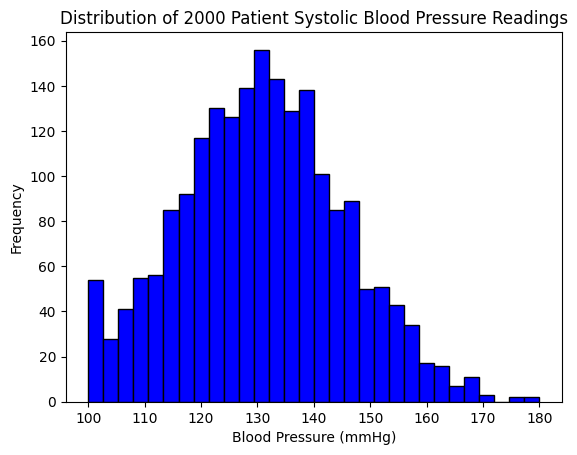

In [ ]:
# Histogram of original blood pressure values
plt.hist(df["BloodPressure"], bins=30, color="blue", edgecolor="black")
plt.title("Distribution of 2000 Patient Systolic Blood Pressure Readings")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.show()

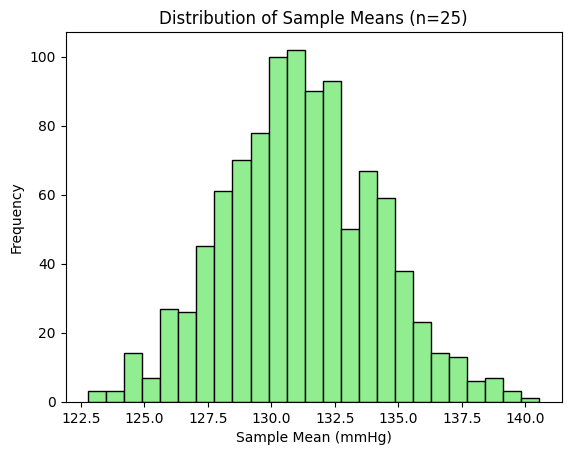

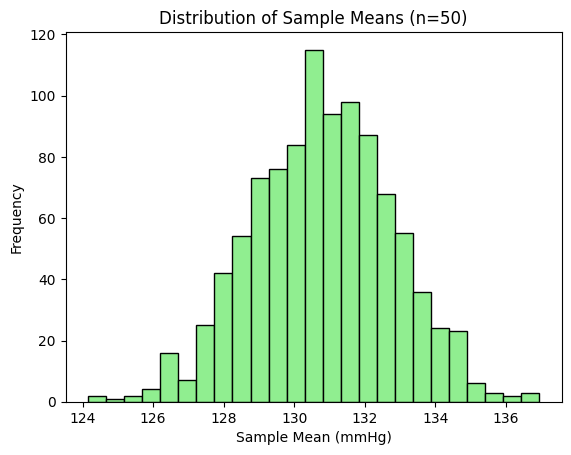

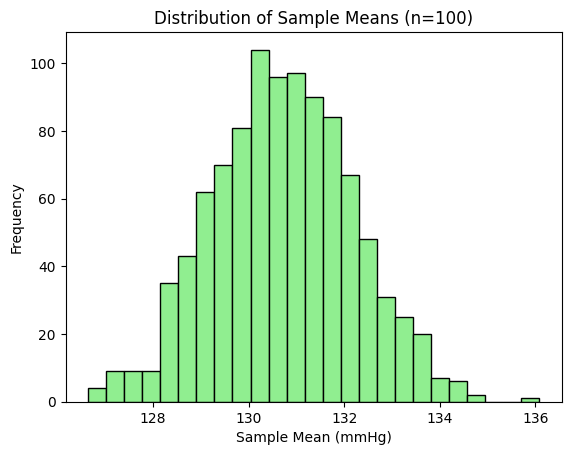

In [ ]:
def sample_means(sample_size, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = df["BloodPressure"].sample(sample_size, replace=True)
        means.append(sample.mean())
    return means

# Different sample sizes
sample_sizes = [25, 50, 100]
for size in sample_sizes:
    means = sample_means(size)
    plt.hist(means, bins=25, color="LIGHTGREEN", edgecolor="black")
    plt.title(f"Distribution of Sample Means (n={size})")
    plt.xlabel("Sample Mean (mmHg)")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Full dataset statistics
orig_mean = df["BloodPressure"].mean()
orig_median = df["BloodPressure"].median()
orig_var = df["BloodPressure"].var()
orig_std = df["BloodPressure"].std()

print("Full Dataset Statistics:")
print(f"Mean: {orig_mean:.2f} | Median: {orig_median:.2f} | Variance: {orig_var:.2f} | Std Dev: {orig_std:.2f}")

# Compare distribution of sample means
for size in sample_sizes:
    means = sample_means(size)
    print(f"\nSample Size: {size}")
    print(f"Mean of Sample Means: {np.mean(means):.2f}")
    print(f"Std Dev of Sample Means: {np.std(means):.2f}")

Full Dataset Statistics:
Mean: 130.78 | Median: 130.67 | Variance: 211.73 | Std Dev: 14.55

Sample Size: 25
Mean of Sample Means: 130.78
Std Dev of Sample Means: 2.82

Sample Size: 50
Mean of Sample Means: 130.73
Std Dev of Sample Means: 2.00

Sample Size: 100
Mean of Sample Means: 130.78
Std Dev of Sample Means: 1.46


Enter a sample size (e.g., 40, 75, 150): 96


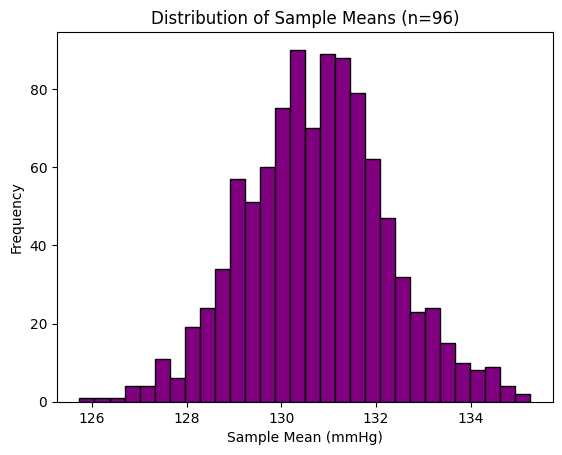

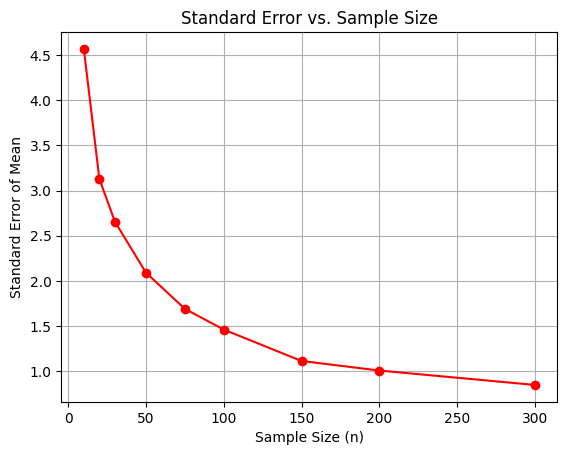

In [ ]:
# User input for custom sample size
sample_size = int(input("Enter a sample size (e.g., 40, 75, 150): "))
means = sample_means(sample_size)

plt.hist(means, bins=30, color="purple", edgecolor="black")
plt.title(f"Distribution of Sample Means (n={sample_size})")
plt.xlabel("Sample Mean (mmHg)")
plt.ylabel("Frequency")
plt.show()

# Standard error vs. sample size
sizes = [10, 20, 30, 50, 75, 100, 150, 200, 300]
std_errors = [np.std(sample_means(s)) for s in sizes]

plt.plot(sizes, std_errors, marker="o", color="red")
plt.title("Standard Error vs. Sample Size")
plt.xlabel("Sample Size (n)")
plt.ylabel("Standard Error of Mean")
plt.grid(True)
plt.show()